In [ ]:
#finance Fraud Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [5]:
train_transaction = pd.read_csv('/content/drive/My Drive/Financial-Fraud-Detection-System/Dataset/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/MyDrive/Financial-Fraud-Detection-System/Dataset/train_identity.csv')
test_transaction = pd.read_csv('/content/drive/My Drive/Financial-Fraud-Detection-System/Dataset/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/MyDrive/Financial-Fraud-Detection-System/Dataset/test_identity.csv')

In [ ]:
# Check for missing values
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing data statistics:")
print(missing_data.head(20))

Missing data statistics:
       Missing Values  Percentage
id_24          585793   99.196159
id_25          585408   99.130965
id_07          585385   99.127070
id_08          585385   99.127070
id_21          585381   99.126393
id_26          585377   99.125715
id_27          585371   99.124699
id_23          585371   99.124699
id_22          585371   99.124699
dist2          552913   93.628374
D7             551623   93.409930
id_18          545427   92.360721
D13            528588   89.509263
D14            528353   89.469469
D12            525823   89.041047
id_03          524216   88.768923
id_04          524216   88.768923
D6             517353   87.606767
id_33          517251   87.589494
id_10          515614   87.312290


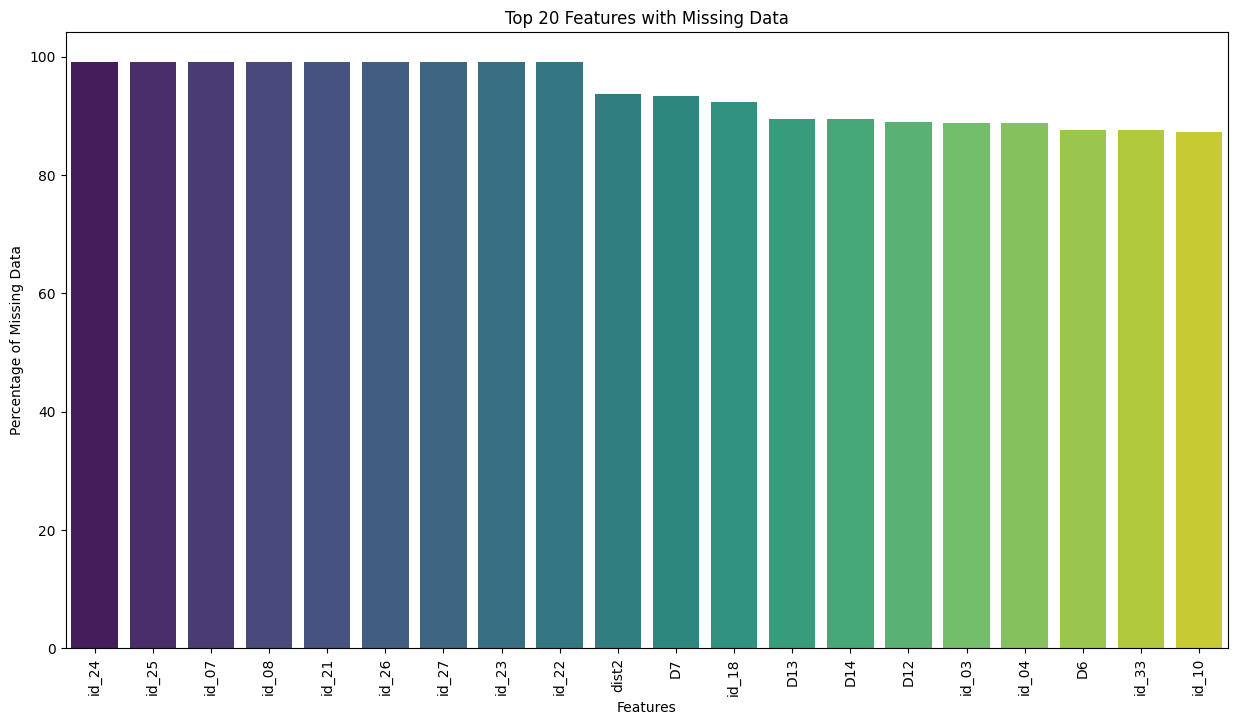

In [ ]:


# Suppress warnings
warnings.filterwarnings("ignore")

# Visualize missing data with a different color palette
plt.figure(figsize=(15, 8))

# Use a different color palette, for example 'viridis'
sns.barplot(x=missing_data.index[:20], y=missing_data['Percentage'][:20], palette='viridis')

plt.xticks(rotation=90)
plt.title('Top 20 Features with Missing Data')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')

# Show the plot
plt.show()


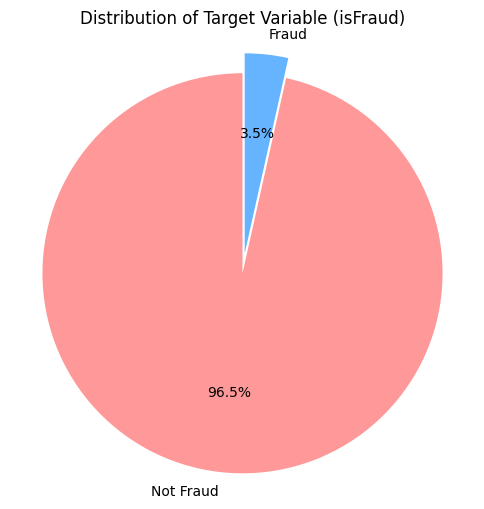

In [ ]:


# Calculate the distribution of the target variable
fraud_counts = df['isFraud'].value_counts()

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff']  # You can customize the colors

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Title
plt.title('Distribution of Target Variable (isFraud)')

# Show the plot
plt.show()


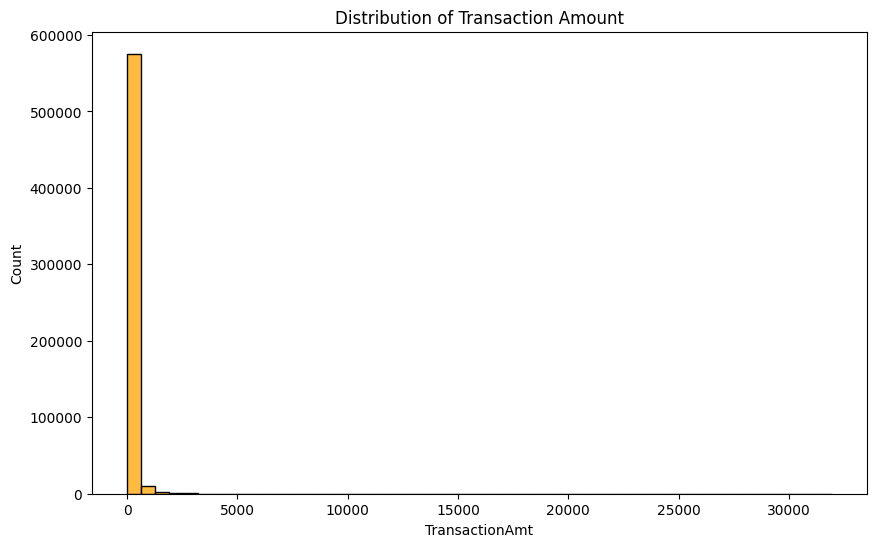

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmt'], bins=50, kde=False, color='orange')
plt.title('Distribution of Transaction Amount')
plt.show()



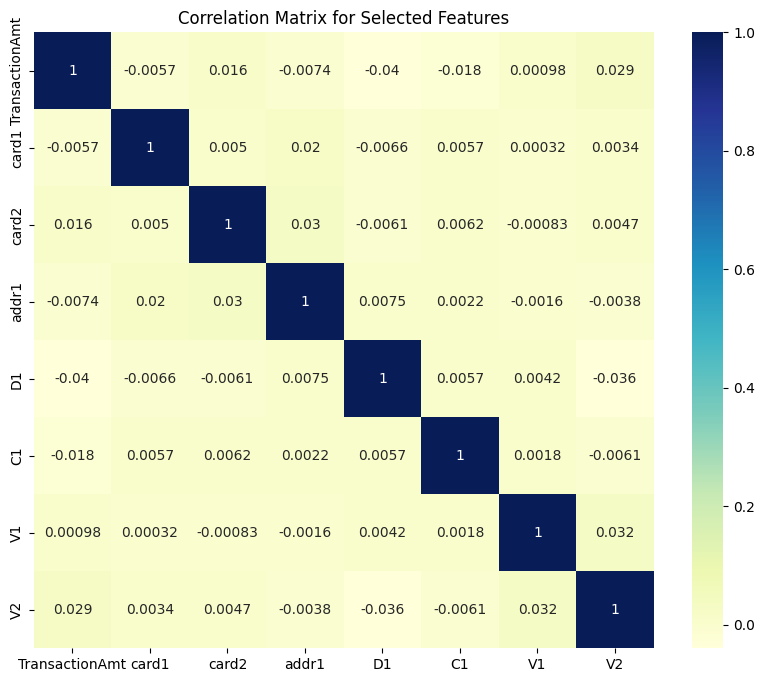

In [ ]:
corr = df[['TransactionAmt', 'card1', 'card2', 'addr1', 'D1', 'C1', 'V1', 'V2']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')  # Using 'YlGnBu' for a sky blue to green palette
plt.title('Correlation Matrix for Selected Features')
plt.show()


<ipython-input-6-e7c84fe8a02d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='isFraud', y='TransactionAmt', data=df, estimator=sum, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


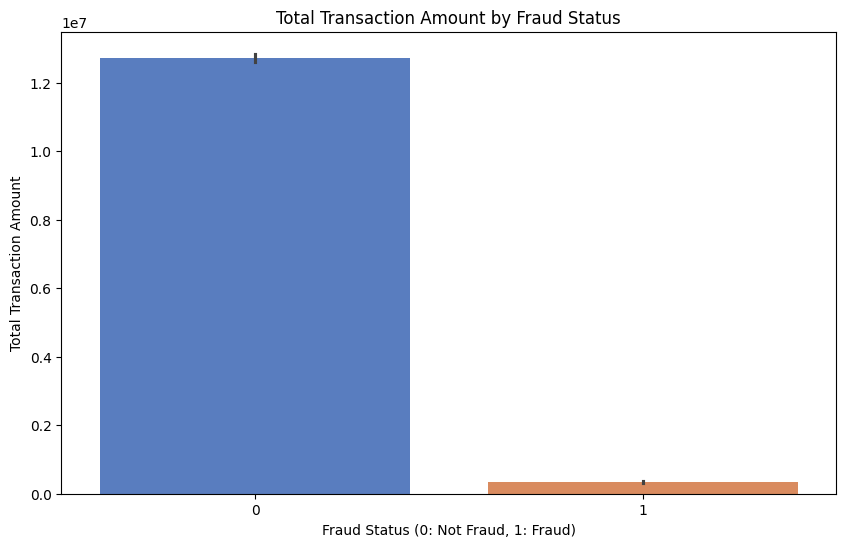

In [6]:
# Plot 5: Barplot of Fraudulent vs Non-Fraudulent Transactions by Transaction Amount
plt.figure(figsize=(10, 6))
sns.barplot(x='isFraud', y='TransactionAmt', data=df, estimator=sum, palette='muted')
plt.title('Total Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status (0: Not Fraud, 1: Fraud)')
plt.ylabel('Total Transaction Amount')
plt.show()

<ipython-input-8-384fb40ed7a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='TransactionAmt', data=df, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

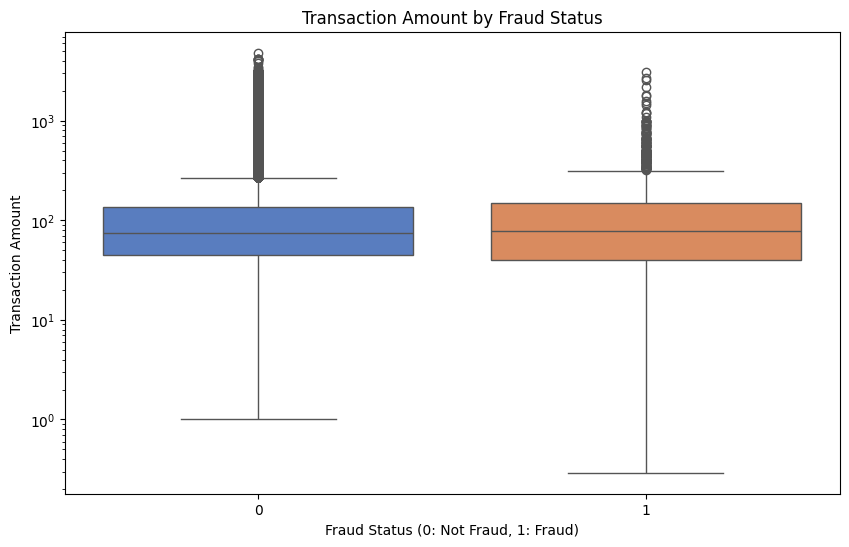

In [8]:
# Plot 6: Boxplot of Transaction Amount by Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='TransactionAmt', data=df, palette='muted')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status (0: Not Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale to handle large outliers
plt.show()

In [ ]:
#Final Train Test

In [3]:
train_transaction_path = '/content/drive/My Drive/Financial-Fraud-Detection-System/Dataset/train_transaction.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Function to reduce memory usage
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > -128 and c_max < 127:
                    df[col] = df[col].astype('int8')
                elif c_min > -32768 and c_max < 32767:
                    df[col] = df[col].astype('int16')
                elif c_min > -2147483648 and c_max < 2147483647:
                    df[col] = df[col].astype('int32')
                else:
                    df[col] = df[col].astype('int64')
            else:
                df[col] = df[col].astype('float32')
        else:
            df[col] = df[col].astype('category')
    return df



df = pd.read_csv(train_transaction_path, nrows=100000)

# Optimize memory usage
df = reduce_mem_usage(df)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float32', 'int8', 'int16', 'int32', 'int64']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the most frequent value (mode)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df.drop(columns=['isFraud', 'TransactionID', 'TransactionDT'])  # Drop irrelevant columns
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print model accuracy and classification report
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 97.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19499
           1       0.62      0.05      0.09       501

    accuracy                           0.98     20000
   macro avg       0.80      0.52      0.54     20000
weighted avg       0.97      0.98      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Function to reduce memory usage
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > -128 and c_max < 127:
                    df[col] = df[col].astype('int8')
                elif c_min > -32768 and c_max < 32767:
                    df[col] = df[col].astype('int16')
                elif c_min > -2147483648 and c_max < 2147483647:
                    df[col] = df[col].astype('int32')
                else:
                    df[col] = df[col].astype('int64')
            else:
                df[col] = df[col].astype('float32')
        else:
            df[col] = df[col].astype('category')
    return df


df = pd.read_csv(train_transaction_path, nrows=100000)

# Optimize memory usage
df = reduce_mem_usage(df)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float32', 'int8', 'int16', 'int32', 'int64']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the most frequent value (mode)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df.drop(columns=['isFraud', 'TransactionID', 'TransactionDT'])  # Drop irrelevant columns
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print model accuracy and classification report
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 98.43%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19499
           1       0.94      0.40      0.56       501

    accuracy                           0.98     20000
   macro avg       0.96      0.70      0.78     20000
weighted avg       0.98      0.98      0.98     20000

